In [1]:
# Loading the packages needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#setting viewing options for dataframe outputs
pd.set_option('display.max_columns', 50)
pd.set_option('max_colwidth',40)
pd.set_option('display.max_rows', 60)
pd.set_option('display.min_rows', 30)

# Reading datasets Needed

In [3]:
# Dataset for invites.
invites = pd.read_excel('data\invites.xlsx')
print(invites.Phone_Numbers.nunique())
print(invites.duplicated().value_counts())
invites.drop_duplicates(inplace = True)
invites.info()

6492
False    6492
True       12
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 6492 entries, 0 to 6503
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Phone_Numbers  6492 non-null   int64
dtypes: int64(1)
memory usage: 101.4 KB


In [4]:
# Dataset shared by WB on Gender and County
wb_data = pd.read_excel('data\Wb-learners-20-11-23.xlsx')
wb_data = wb_data[['county', 'gender','Phone', 'AltPhone']]
#wb_data['Phone'].isin(wb_data['AltPhone']).value_counts()
#bringing together phone and altphone to capture both in interactions
list_county = list(wb_data.county)
list_gender = list(wb_data.gender)
list_phone = list(wb_data.Phone)
list_altphone = list(wb_data.AltPhone)

zip1 = zip(list_county,list_gender,list_phone)
zip2 = zip(list_county,list_gender,list_altphone)

wb1 = pd.DataFrame(zip1,columns=['county','gender','phone'])
wb2 = pd.DataFrame(zip2,columns=['county','gender','phone'])

wb_data2 = pd.concat([wb1,wb2])
wb_data2.drop_duplicates(subset =["phone"], inplace = True)
wb_data2.head(2)

,county,gender,phone
0,Mombasa,Female,254716377808
1,Mombasa,Female,254759653919


In [5]:
wb_data.duplicated().value_counts()

False    6487
True        3
dtype: int64

In [6]:
# LEARNER BEHAVIORAL DATA - includes mode_day and time_interval (will use this to get day and time analytics)
behavioral_analytics = pd.read_csv('data\Wb-learner-behaviour-data.csv')
behavioral_analytics = behavioral_analytics[['learner_id', 'phone_number','days_accessed', 'months_accessed', 'mode_day', 'mode_hour', 'time_interval']]
behavioral_analytics.head(2)

,learner_id,phone_number,days_accessed,months_accessed,mode_day,mode_hour,time_interval
0,1445117,254791578958,2,1,Thursday,9,Morning
1,600234,254799260550,2,1,Wednesday,23,Night


In [7]:
# LEARNER ANALYTICS - include num_interactions(Will use this to get mean and median interaction, interaction bands, general stats on engagement )
learner_analytics = pd.read_csv('data\\analytics_learner_82.csv')
learner_analytics.head(2)

,Unnamed: 0,id,phone_number,first_day_accessed,last_day_accessed,num_interactions,partner_name,project_name,program_id,program_name,variation_id,variation_name,package_id,message_type,sender,digits,BDS_interactions,BDSAC_interactions,BDSACK_interactions,BDSAP_interactions,BDSAPK_interactions,BDSBI_interactions,BDSBIK_interactions,BDSBM_interactions,BDSBMK_interactions,...,BDSCPK_interactions,BDSDM_interactions,BDSDMK_interactions,BDSEN_interactions,BDSENK_interactions,BDSFB_interactions,BDSFBK_interactions,BDSFN_interactions,BDSFNK_interactions,BDSMI_interactions,BDSMIK_interactions,BDSMS_interactions,BDSMSK_interactions,BDSO_interactions,BDSO1_interactions,BDSO1K_interactions,BDSO2_interactions,BDSO2K_interactions,BDSOK_interactions,BDSOQ_interactions,BDSOQK_interactions,BDSPM_interactions,BDSPMK_interactions,BDSRG_interactions,BDSRGK_interactions
0,0,1,254791229014,2020-11-21,2020-11-23,132,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,12,1.0,0.0,0.0,24.0,0.0,19.0,0.0,28.0,0.0,...,0.0,0.0,0.0,24.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2,254743452507,2020-11-20,2020-11-20,23,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
learner_analytics[learner_analytics.num_interactions==5175]

,Unnamed: 0,id,phone_number,first_day_accessed,last_day_accessed,num_interactions,partner_name,project_name,program_id,program_name,variation_id,variation_name,package_id,message_type,sender,digits,BDS_interactions,BDSAC_interactions,BDSACK_interactions,BDSAP_interactions,BDSAPK_interactions,BDSBI_interactions,BDSBIK_interactions,BDSBM_interactions,BDSBMK_interactions,...,BDSCPK_interactions,BDSDM_interactions,BDSDMK_interactions,BDSEN_interactions,BDSENK_interactions,BDSFB_interactions,BDSFBK_interactions,BDSFN_interactions,BDSFNK_interactions,BDSMI_interactions,BDSMIK_interactions,BDSMS_interactions,BDSMSK_interactions,BDSO_interactions,BDSO1_interactions,BDSO1K_interactions,BDSO2_interactions,BDSO2K_interactions,BDSOK_interactions,BDSOQ_interactions,BDSOQK_interactions,BDSPM_interactions,BDSPMK_interactions,BDSRG_interactions,BDSRGK_interactions
2294,2294,2295,254707879478,2020-07-24,2020-11-14,5175,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,12,1.0,0.0,300.0,0.0,332.0,0.0,159.0,0.0,378.0,...,461.0,0.0,478.0,0.0,75.0,0.0,347.0,0.0,266.0,0.0,376.0,0.0,152.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,143.0,0.0,458.0,0.0,394.0


In [9]:
# Program Codes and Names
prog_names = pd.read_csv('data\Program-completion-rates-20-101-2020 (1).csv')
list_code = list(prog_names['Program Code'])
list_Topic = list(prog_names['Topic'])
list_Course = list(prog_names['Training Name'])
dict_topic_codes = dict(zip(list_code,list_Topic)) 
dict_course_codes = dict(zip(list_code,list_Course))

In [17]:
# Complete interaction dataset - to be used to calculate Completion rates and Duration for completion
wbd_int = pd.read_csv('data\Wb-interactions-20-11.csv')
print(wbd_int.info())
wbd_int.head(2)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x93 in position 17: invalid start byte

In [ ]:
wbd_int1[wbd_int1.program_code == 'BDSAC'][wbd_int1[wbd_int1.program_code == 'BDSAC'].phone_number == 254711222335].sort_values(by = ['created_at'], ascending = True)

In [11]:
# dataset containing the clusters
clusters = pd.read_excel('data\cluster.xlsx')
list_county1 = list(clusters.County)
list_cluster = list(clusters.Cluster)
dict_cluster = dict(zip(list_county1,list_cluster))
clusters.head(2)

,County,Cluster
0,Nairobi,C1
1,Kisumu,C1


In [12]:
# dataset containing the knowledge score for quiz_level
df_knowledge_quiz = pd.read_excel('data\World Bank - full_quiz_knowledge_score_table - download.xlsx')
df_knowledge_quiz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872 entries, 0 to 2871
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   phone_number                          2872 non-null   int64  
 1   quizzes_attempted                     2872 non-null   int64  
 2   quiz_code                             2872 non-null   object 
 3   quiz_name                             2872 non-null   object 
 4   blooms_quiz_questions_in_training     2872 non-null   int64  
 5   blooms_questions_attempted_in_quiz    2872 non-null   int64  
 6   questions_completion_rate             2872 non-null   float64
 7   blooms_quiz_questions_scored_correct  2872 non-null   int64  
 8   blooms_quiz_questions_attempt_score   2872 non-null   float64
 9   blooms_quiz_questions_score           2872 non-null   int64  
 10  quiz_total_score                      2872 non-null   float64
 11  quiz_possible_sco

# Merging of Datasets

## Merging interactions and county, gender and cluster

In [13]:
# merging to have a dataset with interactions and county and gender
wbd_interactions = pd.merge(learner_analytics,wb_data2, left_on='phone_number',right_on='phone',how='left')
wbd_interactions_CG = wbd_interactions[['phone_number', 'first_day_accessed','last_day_accessed', 'num_interactions', 'partner_name', 'project_name','program_id', 'program_name', 'variation_id', 'variation_name','package_id', 'message_type', 'sender','county', 'gender']]
#Adding the interactions bands to wbd_interaction_CG table
bins = [0,100,200,300,400,500,10000]
labels = ['< 100', '100 - 199', '200 - 299', '300 - 399', '400 - 499', ' > 500']
wbd_interactions_CG['int_bands'] = pd.cut(x = wbd_interactions_CG['num_interactions'],bins = bins,labels=labels)
#Adding clusters
wbd_interactions_CG['cluster'] = wbd_interactions_CG['county'].map(dict_cluster)
# Display
wbd_interactions_CG

,phone_number,first_day_accessed,last_day_accessed,num_interactions,partner_name,project_name,program_id,program_name,variation_id,variation_name,package_id,message_type,sender,county,gender,int_bands,cluster
0,254791229014,2020-11-21,2020-11-23,132,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kiambu,Female,100 - 199,C3
1,254743452507,2020-11-20,2020-11-20,23,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nakuru,Female,< 100,C1
2,254708644243,2020-11-19,2020-11-22,142,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kiambu,Male,100 - 199,C3
3,254718805285,2020-11-19,2020-11-23,362,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Migori,Female,300 - 399,C2
4,254791862950,2020-11-19,2020-11-19,85,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nairobi,Male,< 100,C1
5,254728263704,2020-11-18,2020-11-18,1,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nairobi,Female,< 100,C1
6,254743711983,2020-11-18,2020-11-18,26,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kitui,Male,< 100,C3
7,254799432709,2020-11-18,2020-11-18,12,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nairobi,Female,< 100,C1
8,254704275042,2020-11-17,2020-11-17,3,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nairobi,Female,< 100,C1
9,254795308211,2020-11-17,2020-11-20,373,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nakuru,Female,300 - 399,C1


## Merging day,time and county, gender and cluster

In [15]:
# merging dataset to have day and time with county
wbd_behavioral = pd.merge(behavioral_analytics,wb_data2, left_on='phone_number',right_on='phone',how='left')
#Adding clusters
wbd_behavioral['cluster'] = wbd_behavioral['county'].map(dict_cluster)
wbd_behavioral.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5168
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   learner_id       5169 non-null   int64  
 1   phone_number     5169 non-null   int64  
 2   days_accessed    5169 non-null   int64  
 3   months_accessed  5169 non-null   int64  
 4   mode_day         5169 non-null   object 
 5   mode_hour        5169 non-null   int64  
 6   time_interval    5169 non-null   object 
 7   county           5139 non-null   object 
 8   gender           5139 non-null   object 
 9   phone            5139 non-null   float64
 10  cluster          5139 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 484.6+ KB


## Merging invites with County and Gender

In [16]:
wbd_invites = pd.merge(invites,wb_data2,left_on='Phone_Numbers',right_on='phone',how = 'left')
wbd_invites['cluster'] = wbd_invites['county'].map(dict_cluster)
wbd_invites.info()
wbd_invites.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6492 entries, 0 to 6491
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Phone_Numbers  6492 non-null   int64  
 1   county         6458 non-null   object 
 2   gender         6458 non-null   object 
 3   phone          6458 non-null   float64
 4   cluster        6458 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 304.3+ KB


,Phone_Numbers,county,gender,phone,cluster
0,254716377808,Mombasa,Female,2.547164e+11,C1
1,254759653919,Mombasa,Female,2.547597e+11,C1


## Merging full interactions with County Gender and Cluster

In [17]:
wbd_int_CG = pd.merge(wbd_int,wb_data2, left_on='phone_number',right_on='phone',how='left')
#Adding clusters
#wbd_int_CG['cluster'] = wbd_int_CG['county'].map(dict_cluster)
wbd_int_CG.phone_number.nunique()

5169

In [135]:
wbd_int_CG1 = pd.merge(wbd_int,wb_data2, left_on='phone_number',right_on='phone',how='right')
#Adding clusters
#wbd_int_CG['cluster'] = wbd_int_CG['county'].map(dict_cluster)
wbd_int_CG1.phone_number.nunique()

5139

In [114]:
## Creating learner level data.
wbd_int_learner_level = wbd_int.groupby('phone_number').message_out.count().reset_index()
labels = ['< 100', '100 - 199', '200 - 299', '300 - 399', '400 - 499', ' > 500']
wbd_int_learner_level['int_bands'] = pd.cut(x = wbd_int_learner_level['message_out'],bins = bins,labels=labels)

In [115]:
wbd_int_learner_level.head(2)

,phone_number,message_out,int_bands
0,254700012380,3,< 100
1,254700013985,525,> 500


In [117]:
wbd_int_learner_level.groupby('int_bands').phone_number.count().reset_index()

,int_bands,phone_number
0,< 100,1377
1,100 - 199,486
2,200 - 299,267
3,300 - 399,903
4,400 - 499,1114
5,> 500,1022


# CODE NEEDED

In [18]:
# Creating interaction bands
#bins = [0,100,200,300,400,500]
#labels = ['< 100', '100 - 199', '200 - 299', '300 - 399', '400 - 499', ' > 500']
#wbd_int['int_bands'] = pd.cut(x = wbd_int['num_interactions'],bins = bins)

In [19]:
#values = {'county': 'N/a', 'gender': 'N/a', 'cluster': 'N/a'}
#df_complete.fillna(value=values,inplace = True)

># Invite Breakdown

In [20]:
wbd_invites.groupby(['county','cluster'])['Phone_Numbers'].nunique().reset_index().head(2)

,county,cluster,Phone_Numbers
0,Bungoma,C2,342
1,Kakamega,C2,569


In [21]:
# Percentage gender interactions by clusters
wbd_invites.groupby(['county','gender'])['Phone_Numbers'].nunique().unstack().reset_index()

gender,county,Female,Male
0,Bungoma,170,172
1,Kakamega,282,287
2,Kiambu,300,332
3,Kilifi,179,220
4,Kisii,196,219
5,Kisumu,183,181
6,Kitui,217,217
7,Kwale,87,83
8,Machakos,130,131
9,Migori,193,219


># SUBSET NON CONVERTERS

In [22]:
# checking for non learners
print(wbd_behavioral['phone_number'].isin(wbd_invites['Phone_Numbers']).value_counts())
print(wbd_invites['Phone_Numbers'].isin(wbd_behavioral['phone_number']).value_counts())

True     5157
False      12
Name: phone_number, dtype: int64
True     5157
False    1335
Name: Phone_Numbers, dtype: int64


In [23]:
# checking for non learners with demographics data
invites_cg = wbd_invites[wbd_invites['gender'].notnull()]
print(invites_cg.info())
#invites_cg = invites_cg[['Phone_Numbers']]
invites_cg.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6458 entries, 0 to 6477
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Phone_Numbers  6458 non-null   int64  
 1   county         6458 non-null   object 
 2   gender         6458 non-null   object 
 3   phone          6458 non-null   float64
 4   cluster        6458 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 302.7+ KB
None


,Phone_Numbers,county,gender,phone,cluster
0,254716377808,Mombasa,Female,2.547164e+11,C1
1,254759653919,Mombasa,Female,2.547597e+11,C1


In [24]:
learners_cg = wbd_interactions_CG[wbd_interactions_CG['gender'].notnull()]
learners_cg = learners_cg[['phone_number','num_interactions']]
print(learners_cg.info())
learners_cg.head(2)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5139 entries, 0 to 5168
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   phone_number      5139 non-null   int64
 1   num_interactions  5139 non-null   int64
dtypes: int64(2)
memory usage: 120.4 KB
None


,phone_number,num_interactions
0,254791229014,132
1,254743452507,23


In [25]:
# Merging the dataset to get the non learners with demo
non_learners_cg = pd.merge(invites_cg,learners_cg,left_on='Phone_Numbers',right_on='phone_number',how='left')
non_learners_cg2 = non_learners_cg[non_learners_cg['num_interactions'].isnull()]

In [26]:
non_learners_cg2.groupby('gender')['Phone_Numbers'].nunique()

gender
Female    657
Male      662
Name: Phone_Numbers, dtype: int64

In [27]:
non_learners_cg2.groupby('cluster')['Phone_Numbers'].nunique()

cluster
C1    521
C2    371
C3    427
Name: Phone_Numbers, dtype: int64

># Language Preference

In [29]:
wbd_int_lang = wbd_int[wbd_int.program_code == 'BDS']
#wbd_int_lang.groupby(['user_response']).phone_number.nunique().to_csv()

In [133]:
codes = pd.DataFrame(list_code,columns = ['code'])
codes['Kisw'] = codes.code.apply(lambda x : True if 'K' in x else False)
codes.head(2)

kisw_codes = codes[codes.Kisw == True]
all_kisw_codes = list(kisw_codes['code'])
eng_codes = codes[codes.Kisw == False]
all_eng_codes = list(eng_codes['code'])
all_kisw_codes

['BDSACK',
 'BDSFBK',
 'BDSRGK',
 'BDSBRK',
 'BDSMIK',
 'BDSOQK',
 'BDSFNK',
 'BDSAPK',
 'BDSPMK',
 'BDSDMK',
 'BDSCCK',
 'BDSCPK',
 'BDSMSK',
 'BDSBIK',
 'BDSBMK',
 'BDSENK']

In [31]:
wbd_int_kisw = []
for x in all_kisw_codes:
    kisw = wbd_int_CG[wbd_int_CG['program_code'] == x]
    wbd_int_kisw.append(kisw)

wbd_int_kisw = pd.concat(wbd_int_kisw)
wbd_int_kisw.head(2)

,Unnamed: 0,learner_id,phone_number,partner_id,partner_name,project_name,program_id,program_code,program_name,variation_id,variation_code,variation_name,package_id,message_type,object_id,message_out,message_in,sender,outbox_id,created_at,inbox_id,user_response,digits,county,gender,phone
1562,1563,1492512,254700068751,82,World Bank,WB-BDS,1566,BDSACK,Kupitia Mpango wa Utekelezaji,1697,BDSACK,Kupitia Mpango wa Utekelezaji,11558,1,102860,"Asante kwa maoni yako! Sasa, jibu 2 ...",Kwa Sasa nimeridhika na mafunzo haya...,33300,35531118,2020-11-20 18:49:48,35728717,2,12,Kitui,Male,2.547001e+11
1563,1564,1492512,254700068751,82,World Bank,WB-BDS,1566,BDSACK,Kupitia Mpango wa Utekelezaji,1697,BDSACK,Kupitia Mpango wa Utekelezaji,11557,1,102859,Ni nini tena ulitaka kujifunza katik...,1,33300,35530960,2020-11-20 18:47:54,35728551,Kwa Sasa nimeridhika na mafunzo haya...,12,Kitui,Male,2.547001e+11


In [32]:
wbd_int_eng = []
for x in all_eng_codes:
    eng = wbd_int_CG[wbd_int_CG['program_code'] == x]
    wbd_int_eng.append(eng)

wbd_int_eng = pd.concat(wbd_int_eng)
wbd_int_eng.program_code.unique()

array(['BDSAC', 'BDSFB', 'BDSPM', 'BDSDM', 'BDSCC', 'BDSCP', 'BDSBR',
       'BDSMI', 'BDSOQ', 'BDSAP', 'BDSMS', 'BDSFN', 'BDSRG', 'BDSBM',
       'BDSBI', 'BDSEN'], dtype=object)

># Completed the Training set

In [102]:
wbd_intFullTrain = []
def complete_training(df,list_full):
    for x in list_full:
        full_train = df[df['program_code'] == x]
        wbd_intFullTrain.append(full_train)
        
    return pd.concat(wbd_intFullTrain)

In [103]:
df_fullTrain = complete_training(wbd_int,['BDSAC','BDSACK'])

In [104]:
df_fullTrain.head(2)

,Unnamed: 0,learner_id,phone_number,partner_id,partner_name,project_name,program_id,program_code,program_name,variation_id,variation_code,variation_name,package_id,message_type,object_id,message_out,message_in,sender,outbox_id,created_at,inbox_id,user_response,digits
104,105,1493543,254700013985,82,World Bank,WB-BDS,1106,BDSAC,Review of Action plan,1237,BDSAC,Review of Action plan,10642,1,91854,"Thanks for your feedback! Now, reply...",To avoid failure in business,33300,31098343,2020-07-27 15:35:38,31406215,2,12
105,106,1493543,254700013985,82,World Bank,WB-BDS,1106,BDSAC,Review of Action plan,1237,BDSAC,Review of Action plan,10623,1,103050,What else did you want to learn in t...,1,33300,31098165,2020-07-27 15:34:14,31406030,To avoid failure in business,12


In [105]:
df_fullTrain.message_out.unique()

array(['Thanks for your feedback! Now, reply 2 take the quiz and earn a certificate or reply 1 to choose another lesson.\n1. Main menu\n2. Certificate',
       'What else did you want to learn in this course? Reply with 1-3 sentences.',
       'How satisfied are you with this course? Reply with a number:\n1. Very satisfied\n2. A little satisfied\n3. Not so satisfied\n4. Not at all satisfied',
       'Here is a link to the Action Plan outline. Please note that this may use some of your data bundle.https://go.aws/2TuhZB7 Reply A to continue',
       'Make sure to fill in your action plan and take the necessary steps in turning your dreams into a reality! Reply A to continue',
       'Here is a link to the BMC outline. Please note that this may use some of your data bundle.https://bit.ly/31pGKTR Reply A to continue',
       'Good job. Managing your income will help you avoid getting into debt, you will build wealth, and become financially independent.\nReply A to continue',
       '(10/10

In [106]:
df_fullTrain_comp = df_fullTrain[(df_fullTrain.message_out == '(10/10) 7. Are you managing your finances? If you can manage your money well, you will be able to grow as a business by saving and investing.\n1. Yes\n2. No') | (df_fullTrain.message_out == '(10/10) 7. Je, unadhibiti pesa zako? Iwapo uanweza kudhibiti pesa zako vizuri, utaweza kukua kama biashara kwa kuweka akiba na kuwekeza.\n1. Ndiyo\n2. La')]
df_fullTrain_comp.learner_id.nunique()

2945

In [121]:
learners_FullTrain_list = df_fullTrain_comp.phone_number.unique()
fullTrain_learners = pd.DataFrame(learners_FullTrain_list)
print(fullTrain_learners.duplicated().value_counts())
fullTrain_learners.columns = ['phone_number']
# merge to get COunty and Gender
fullTrain_learners_CG = pd.merge(fullTrain_learners,wb_data2, left_on='phone_number',right_on='phone',how='left')
fullTrain_learners_CG['cluster'] = fullTrain_learners_CG['county'].map(dict_cluster)
fullTrain_learners_CG.head(2)

False    2945
dtype: int64


,phone_number,county,gender,phone,cluster
0,254700013985,Kisumu,Male,2.547000e+11,C1
1,254700066571,Kakamega,Female,2.547001e+11,C2


In [124]:
fullTrain_learners_CG.groupby('cluster').phone_number.count().reset_index()

,cluster,phone_number
0,C1,855
1,C2,1123
2,C3,958


In [125]:
#fullTrain_learners = df_fullTrain_comp[['learner_id','phone_number']]
fullTrain_learners_int = pd.merge(fullTrain_learners,wbd_interactions_CG,left_on='phone_number',right_on ='phone_number',how = 'left')

,phone_number,first_day_accessed,last_day_accessed,num_interactions,partner_name,project_name,program_id,program_name,variation_id,variation_name,package_id,message_type,sender,county,gender,int_bands,cluster
0,254700013985,2020-07-22,2020-09-16,525,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kisumu,Male,> 500,C1
1,254700066571,2020-07-22,2020-09-18,837,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kakamega,Female,> 500,C2
2,254700068918,2020-07-22,2020-09-29,765,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Mombasa,Female,> 500,C1
3,254700072539,2020-07-25,2020-07-27,448,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nairobi,Male,400 - 499,C1
4,254700089065,2020-07-22,2020-10-24,982,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kiambu,Male,> 500,C3
5,254700103927,2020-07-23,2020-07-24,500,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Turkana,Male,400 - 499,C2
6,254700117102,2020-07-23,2020-07-29,448,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kakamega,Male,400 - 499,C2
7,254700125444,2020-08-04,2020-11-23,756,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Bungoma,Female,> 500,C2
8,254700130851,2020-07-25,2020-08-06,405,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Bungoma,Male,400 - 499,C2
9,254700150644,2020-08-19,2020-10-23,376,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nairobi,Female,300 - 399,C1


In [130]:
fullTrain_learners_int[fullTrain_learners_int.num_interactions <= 400].sort_values(by = ['num_interactions'])

,phone_number,first_day_accessed,last_day_accessed,num_interactions,partner_name,project_name,program_id,program_name,variation_id,variation_name,package_id,message_type,sender,county,gender,int_bands,cluster
2273,254799260550,2020-07-22,2020-07-23,340,World Bank,WB-BDS,1094,Action plan,1225,Action plan,10611,1,22744,NaN,NaN,300 - 399,NaN
2417,254705623530,2020-08-19,2020-11-14,356,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Bungoma,Male,300 - 399,C2
2821,254790259937,2020-07-23,2020-11-16,361,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Machakos,Male,300 - 399,C3
2842,254791949244,2020-08-19,2020-11-24,361,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Mombasa,Female,300 - 399,C1
2379,254703766922,2020-07-23,2020-11-16,362,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kilifi,Female,300 - 399,C3
161,254702418346,2020-07-22,2020-11-21,362,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kilifi,Male,300 - 399,C3
1117,254718805285,2020-11-19,2020-11-23,362,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Migori,Female,300 - 399,C2
875,254714788036,2020-11-13,2020-11-23,363,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Mombasa,Female,300 - 399,C1
1197,254720125798,2020-08-22,2020-10-27,363,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Kitui,Male,300 - 399,C3
1772,254746682627,2020-09-22,2020-09-26,364,World Bank,WB-BDS,1111,WB -BDS Language selection - English,1242,WB -BDS Language selection - English,10646,1,33300,Nairobi,Female,300 - 399,C1


In [126]:
fullTrain_learners_int.num_interactions.min()

340

In [109]:
fullTrain_learners_int.groupby('int_bands').phone_number.count()

int_bands
< 100           0
100 - 199       0
200 - 299       0
300 - 399     814
400 - 499    1110
 > 500       1021
Name: phone_number, dtype: int64

>### General

>### Gender

In [33]:
wbd_int_kisw.groupby(['gender']).phone_number.nunique()

gender
Female    683
Male      609
Name: phone_number, dtype: int64

In [34]:
wbd_int_eng.groupby(['gender']).phone_number.nunique()

gender
Female    1838
Male      2150
Name: phone_number, dtype: int64

>### Cluster

In [93]:
wbd_int_kisw.groupby(['cluster']).phone_number.nunique()

cluster
C1    357
C2    507
C3    428
Name: phone_number, dtype: int64

# Interaction Level - High Level

>## % Engagement by Category

In [35]:
#defined function to get for each category
def get_category(s):
    df = wbd_interactions_CG.groupby([s]).phone_number.nunique().reset_index()
    df.rename(columns={"phone_number": "No_of_learners"},inplace = True)
    df['Percentage'] = df['No_of_learners'] / df['No_of_learners'].sum() * 100
    return df

In [36]:
def get_category_county(s):
    df = wbd_interactions_CG.groupby([s]).phone_number.nunique().reset_index()
    df.rename(columns={"phone_number": "No_of_learners"},inplace = True)
    df['Percentage'] = df['No_of_learners'] / df['No_of_learners'].sum() * 100
    df['cluster'] = df['county'].map(dict_cluster)
    df.sort_values(by = ['cluster', 'Percentage'])
    return df

In [37]:
get_category('gender')

,gender,No_of_learners,Percentage
0,Female,2448,47.635727
1,Male,2691,52.364273


In [38]:
get_category_county('county')

,county,No_of_learners,Percentage,cluster
0,Bungoma,275,5.351236,C2
1,Kakamega,486,9.457093,C2
2,Kiambu,520,10.118700,C3
3,Kilifi,296,5.759875,C3
4,Kisii,304,5.915548,C2
5,Kisumu,294,5.720957,C1
6,Kitui,362,7.044172,C3
7,Kwale,137,2.665888,C1
8,Machakos,203,3.950185,C3
9,Migori,363,7.063631,C2


>## Learners by Interaction Bands

In [39]:
wbd_interactions_CG.groupby(['gender','cluster']).num_interactions.mean().unstack().reset_index()

cluster,gender,C1,C2,C3
0,Female,308.888889,477.057457,389.068692
1,Male,292.326902,447.777042,382.825117


In [40]:
wbd_interactions_CG.groupby(['county','gender']).num_interactions.mean().unstack().reset_index()

gender,county,Female,Male
0,Bungoma,573.613139,446.673913
1,Kakamega,506.836910,457.308300
2,Kiambu,328.429167,312.314286
3,Kilifi,427.150794,476.970588
4,Kisii,396.465753,395.018987
5,Kisumu,336.762238,342.225166
6,Kitui,477.994536,429.273743
7,Kwale,329.830986,288.090909
8,Machakos,403.930000,340.067961
9,Migori,408.093023,407.429319


In [41]:
wbd_interactions_CG.groupby(['county']).num_interactions.mean().reset_index()

,county,num_interactions
0,Bungoma,509.912727
1,Kakamega,481.053498
2,Kiambu,319.751923
3,Kilifi,455.763514
4,Kisii,395.713816
5,Kisumu,339.568027
6,Kitui,453.903315
7,Kwale,309.722628
8,Machakos,371.527094
9,Migori,407.743802


### Mean Interactions

In [42]:
wbd_interactions_CG.num_interactions.mean()

380.29812342812926

In [14]:
wbd_interactions_CG[wbd_interactions_CG.gender == 'Female'].num_interactions.max()

5064

In [15]:
wbd_interactions_CG[wbd_interactions_CG.gender == 'Male'].num_interactions.max()

5175

In [45]:
wbd_interactions_CG[wbd_interactions_CG.gender == 'Male'].num_interactions.mean()

373.3162393162393

In [46]:
wbd_interactions_CG[wbd_interactions_CG.cluster == 'C3'].num_interactions.mean()

385.7625854568055

### Median Interactions

In [47]:
wbd_interactions_CG.num_interactions.median()

380.0

In [ ]:
wbd_interactions_CG[wbd_interactions_CG.gender == 'Female'].num_interactions.median()

In [48]:
wbd_interactions_CG[wbd_interactions_CG.gender == 'Female'].num_interactions.median()

379.0

In [49]:
wbd_interactions_CG[wbd_interactions_CG.gender == 'Male'].num_interactions.median()

381.0

In [50]:
wbd_interactions_CG[wbd_interactions_CG.cluster == 'C3'].num_interactions.median()

383.0

## Calculations

In [51]:
def get_bands_category(s):
    df = wbd_interactions_CG.groupby([s]).phone_number.nunique().reset_index()
    df.rename(columns={"phone_number": "No_of_learners"},inplace = True)
    df['Percentage'] = df['No_of_learners'] / df['No_of_learners'].sum() * 100
    return df

In [52]:
get_bands_category('int_bands')

,int_bands,No_of_learners,Percentage
0,< 100,1377,26.639582
1,100 - 199,486,9.402205
2,200 - 299,267,5.165409
3,300 - 399,903,17.469530
4,400 - 499,1114,21.551557
5,> 500,1022,19.771716


In [219]:
wbd_interactions_CG.groupby(['int_bands','gender']).phone_number.nunique().unstack().reset_index()

gender,int_bands,Female,Male
0,< 100,645,717
1,100 - 199,247,233
2,200 - 299,130,137
3,300 - 399,427,474
4,400 - 499,477,635
5,> 500,522,495


In [220]:
wbd_interactions_CG.groupby(['int_bands','cluster']).phone_number.nunique().unstack().reset_index()

cluster,int_bands,C1,C2,C3
0,< 100,637,327,398
1,100 - 199,199,138,143
2,200 - 299,82,98,87
3,300 - 399,329,291,281
4,400 - 499,320,411,381
5,> 500,239,459,319


>## Learners by Day and Time

In [221]:
wbd_behavioral.groupby(['mode_day','time_interval']).phone_number.nunique().unstack().reset_index()

time_interval,mode_day,Afternoon,Early Morning,Evening,Morning,Night
0,Friday,174,22,398,245,221
1,Monday,86,8,98,74,84
2,Saturday,115,35,241,192,159
3,Sunday,56,17,124,85,82
4,Thursday,200,81,433,336,262
5,Tuesday,58,13,263,84,108
6,Wednesday,77,14,401,114,209


In [ ]:
# Gender

In [225]:
wbd_behavioral[wbd_behavioral.gender == 'Male'].groupby(['mode_day','time_interval']).phone_number.nunique().unstack().reset_index()

time_interval,mode_day,Afternoon,Early Morning,Evening,Morning,Night
0,Friday,86,11,208,136,126
1,Monday,36,5,52,39,51
2,Saturday,58,23,104,116,79
3,Sunday,30,9,55,53,42
4,Thursday,98,49,232,179,145
5,Tuesday,34,5,130,47,46
6,Wednesday,37,8,200,51,111


In [ ]:
# CLUSTER

In [228]:
wbd_behavioral[wbd_behavioral.cluster == 'C3'].groupby(['mode_day','time_interval']).learner_id.nunique().unstack().reset_index()

time_interval,mode_day,Afternoon,Early Morning,Evening,Morning,Night
0,Friday,52,5,124,79,71
1,Monday,15,5,35,26,33
2,Saturday,37,14,62,67,53
3,Sunday,19,6,45,34,28
4,Thursday,61,21,141,81,75
5,Tuesday,25,6,82,26,32
6,Wednesday,22,6,124,46,51


In [ ]:
# COUNTY

In [369]:
wbd_beh_county = wbd_behavioral[wbd_behavioral.county == 'Machakos'].groupby(['mode_day','time_interval']).learner_id.nunique().unstack().reset_index()
wbd_beh_county[['mode_day','Early Morning','Morning','Afternoon','Evening','Night']]

time_interval,mode_day,Early Morning,Morning,Afternoon,Evening,Night
0,Friday,NaN,9.0,10.0,20.0,10.0
1,Monday,1.0,NaN,NaN,4.0,5.0
2,Saturday,NaN,15.0,5.0,6.0,4.0
3,Sunday,NaN,NaN,2.0,7.0,2.0
4,Thursday,2.0,7.0,6.0,20.0,11.0
5,Tuesday,NaN,4.0,4.0,10.0,4.0
6,Wednesday,NaN,2.0,6.0,20.0,7.0


>## Duration

In [371]:
wbd_int.learner_id.unique(x)

array([1490287, 1493543, 1493697, ..., 1492813, 1494850, 1492046],
      dtype=int64)

In [384]:
wbd_int_test = wbd_int[wbd_int.learner_id == 1492813]
wbd_int_test.head(2)

,Unnamed: 0,learner_id,phone_number,partner_id,partner_name,project_name,program_id,program_code,program_name,variation_id,...,message_type,object_id,message_out,message_in,sender,outbox_id,created_at,inbox_id,user_response,digits
1964437,1964438,1492813,254799981305,82,World Bank,WB-BDS,1099,BDSRG,Registration,1230,...,1,91916,"(5/20) 6. Pay (Ksh 150/-) via MPesa, debit car...",FLIGHT =,33300,35166389,2020-11-13 21:18:46,35379094,NaN,12
1964438,1964439,1492813,254799981305,82,World Bank,WB-BDS,1099,BDSRG,Registration,1230,...,1,91915,(4/20) 5. Submit your most preferred name of t...,A,33300,33830805,2020-10-01 14:08:02,34207722,FLIGHT =,12


In [385]:
print(wbd_int_test.created_at.min())
print(wbd_int_test.created_at.max())

2020-09-22 16:36:34
2020-11-13 21:18:46


# Data Visualisation

In [248]:
sns.set_context('notebook',font_scale=1.0,rc={"lines.linewidth":1.0})
sns.set_palette("pastel")
sns.set_style("ticks")

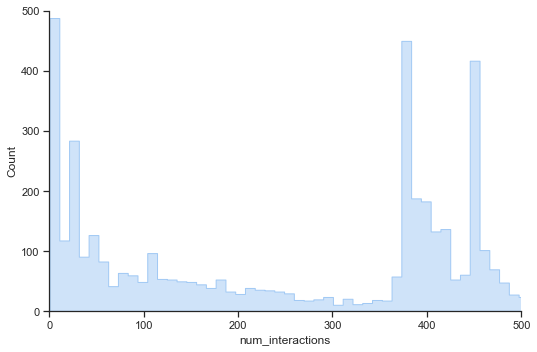

In [263]:
sns.displot(wbd_interactions_CG, x="num_interactions", alpha = 0.5, bins = 500,element = 'step',multiple="stack",aspect=15/10)
plt.axis([0,500,0,500])
#g.set_xticks([0,50,100,150,200,250,300,350,400,450,500])
plt.show()

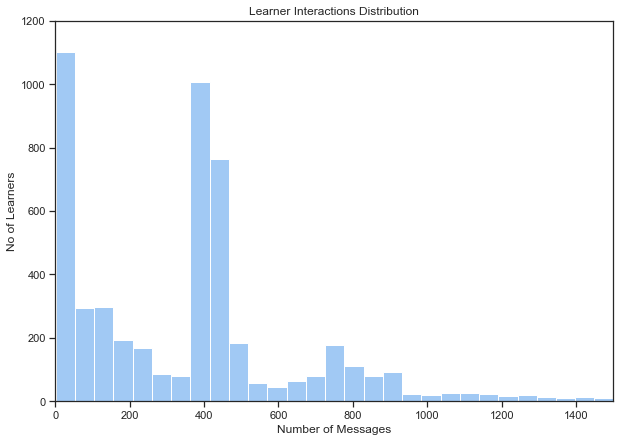

In [282]:
fig = plt.figure(figsize=(10,7))
ax = plt.subplot()
plt.hist(wbd_interactions_CG.num_interactions,bins=100)
plt.title('Learner Interactions Distribution')
plt.xlabel('Number of Messages')
plt.ylabel('No of Learners')
plt.axis([0,1500,0,1200])
#ax.set_xticks(list(range(0,2000,100)))
plt.show()

In [285]:
fig.savefig('plot.png',dpi=1080)